# Problem Statement:

Our dataset consists of 5 labels of Ratings of a product from 1 star to 5 stars (1 being worst rating and 5 being the highest rating given to a product). This project aims to implement various Machine Learning algorithms and deep learning algorithms like Multilayer perceptron(MLP), Long Short Term Memory Networks, Multinomial Naïve Baiyes, Logistic Regression, Random Forest Classifier , Linear SVC and Adaptive Boosting. Data used in this project are online product reviews collected from “flipkart.com”.




### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#Importing Visualising Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
import scikitplot as skplt


#Importing DataCleaning Libraries
import nltk
from collections import Counter
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split

#Importing Classification Models 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Importing Classification Model Evaluation Metrics 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss, hamming_loss, average_precision_score

#Importing Hyperparameter Tuning model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Importing Serialization libraries
import joblib

In [2]:
df = pd.read_csv("Ratings")
df

,Rating,Review,Number of Ratings,Number of Reviews
0,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews"
1,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews"
2,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews"
3,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews"
4,4.4★,"Really nice phone, delivery is so fast that's ...","['1,12,813 Ratings &']","5,611 Reviews"
...,...,...,...,...
9796,4.5★,I have purchased it a week back. Its us really...,"['1,315 Ratings &']",145 Reviews
9797,4.2★,Wire quality is pretty good and the length of ...,['158 Ratings &'],15 Reviews
9798,-,-,NaN,-
9799,-,-,NaN,-


## Exploratory Data Analysis

In [3]:
#Analysing Datatypes in our dataset and Checking for null Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Rating             9801 non-null   object
 1   Review             9801 non-null   object
 2   Number of Ratings  9132 non-null   object
 3   Number of Reviews  9801 non-null   object
dtypes: object(4)
memory usage: 306.4+ KB


In [4]:
# Checking for null Values

print("Null values in dataset: \n \n", df.isna().sum())

Null values in dataset: 
 
 Rating                 0
Review                 0
Number of Ratings    669
Number of Reviews      0
dtype: int64


AxesSubplot(0.125,0.125;0.62x0.755)


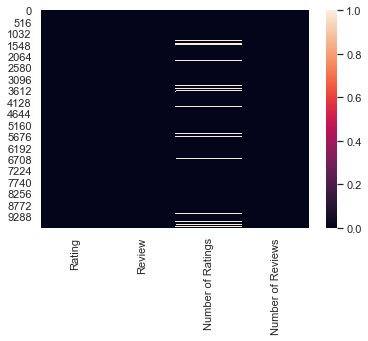

In [5]:
print(sns.heatmap(df.isna()))

In [6]:
#Analysing Datatypes in our dataset and Checking for null Values

df.describe()

,Rating,Review,Number of Ratings,Number of Reviews
count,9801,9801,9132,9801
unique,36,3314,1674,872
top,4.3★,-,['3 Ratings &'],0 Reviews
freq,816,2023,457,1172


## Data Preprocessing

In [7]:
def  clean_text(df, Review, clean_comment):
    
    #Lower casing all str objects
    df['clean_comment'] = df['Review'].str.lower()
    
    #Removing all numbers, special characters, web addresses and urls
    df['clean_comment'] = df['clean_comment'].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    
    # remove \n, \d
    df['clean_comment'] = df['clean_comment'].apply(lambda elem: re.sub(r"\d+\n", "", elem))
    
    return df

data_clean = clean_text(df, 'text', 'text_clean')
data_clean.head()                     

,Rating,Review,Number of Ratings,Number of Reviews,clean_comment
0,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone with decent performance good ...
1,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone with decent performance good ...
2,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",very nice phone from realme loved it camera i...
3,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",very nice phone from realme loved it camera i...
4,4.4★,"Really nice phone, delivery is so fast that's ...","['1,12,813 Ratings &']","5,611 Reviews",really nice phone delivery is so fast thats ex...


In [8]:
# Removing stopwords
stop = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
#stop = stopwords.words('english')
df['clean_comment'] = df['clean_comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.head()

,Rating,Review,Number of Ratings,Number of Reviews,clean_comment
0,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone decent performance good first...
1,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone decent performance good first...
2,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",nice phone realme loved camera good battery al...
3,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",nice phone realme loved camera good battery al...
4,4.4★,"Really nice phone, delivery is so fast that's ...","['1,12,813 Ratings &']","5,611 Reviews",really nice phone delivery fast thats excellen...


In [9]:
#Splitting into word tokens

df['text_tokens'] = df['clean_comment'].apply(lambda x: word_tokenize(x))
df.head()

,Rating,Review,Number of Ratings,Number of Reviews,clean_comment,text_tokens
0,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone decent performance good first...,"[good, handy, phone, decent, performance, good..."
1,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone decent performance good first...,"[good, handy, phone, decent, performance, good..."
2,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",nice phone realme loved camera good battery al...,"[nice, phone, realme, loved, camera, good, bat..."
3,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",nice phone realme loved camera good battery al...,"[nice, phone, realme, loved, camera, good, bat..."
4,4.4★,"Really nice phone, delivery is so fast that's ...","['1,12,813 Ratings &']","5,611 Reviews",really nice phone delivery fast thats excellen...,"[really, nice, phone, delivery, fast, thats, e..."


In [10]:
#Performing Lemmatization of words

def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
df['text_tokens_lemma'] = data_clean['text_tokens'].apply(lambda x: word_lemmatizer(x))
df['text_tokens_lemma'] = data_clean['text_tokens_lemma'].apply(lambda x: " ".join(x))

df.head()

,Rating,Review,Number of Ratings,Number of Reviews,clean_comment,text_tokens,text_tokens_lemma
0,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone decent performance good first...,"[good, handy, phone, decent, performance, good...",good handy phone decent performance good first...
1,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone decent performance good first...,"[good, handy, phone, decent, performance, good...",good handy phone decent performance good first...
2,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",nice phone realme loved camera good battery al...,"[nice, phone, realme, loved, camera, good, bat...",nice phone realme loved camera good battery al...
3,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",nice phone realme loved camera good battery al...,"[nice, phone, realme, loved, camera, good, bat...",nice phone realme loved camera good battery al...
4,4.4★,"Really nice phone, delivery is so fast that's ...","['1,12,813 Ratings &']","5,611 Reviews",really nice phone delivery fast thats excellen...,"[really, nice, phone, delivery, fast, thats, e...",really nice phone delivery fast thats excellen...


In [11]:
#Performing part of speech tagging

def word_pos_tagger(text):
    pos_tagged_text = nltk.pos_tag(text)
    return pos_tagged_text

data_clean['text_tokens_pos_tagged'] = data_clean['text_tokens'].apply(lambda x: word_pos_tagger(x))
data_clean.head()

,Rating,Review,Number of Ratings,Number of Reviews,clean_comment,text_tokens,text_tokens_lemma,text_tokens_pos_tagged
0,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone decent performance good first...,"[good, handy, phone, decent, performance, good...",good handy phone decent performance good first...,"[(good, JJ), (handy, NN), (phone, NN), (decent..."
1,4.4★,Good handy phone with decent performance. Good...,"['2,29,616 Ratings &']","10,886 Reviews",good handy phone decent performance good first...,"[good, handy, phone, decent, performance, good...",good handy phone decent performance good first...,"[(good, JJ), (handy, NN), (phone, NN), (decent..."
2,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",nice phone realme loved camera good battery al...,"[nice, phone, realme, loved, camera, good, bat...",nice phone realme loved camera good battery al...,"[(nice, JJ), (phone, NN), (realme, NN), (loved..."
3,4.4★,Very nice phone from realme . Loved it Camera ...,"['66,119 Ratings &']","3,655 Reviews",nice phone realme loved camera good battery al...,"[nice, phone, realme, loved, camera, good, bat...",nice phone realme loved camera good battery al...,"[(nice, JJ), (phone, NN), (realme, NN), (loved..."
4,4.4★,"Really nice phone, delivery is so fast that's ...","['1,12,813 Ratings &']","5,611 Reviews",really nice phone delivery fast thats excellen...,"[really, nice, phone, delivery, fast, thats, e...",really nice phone delivery fast thats excellen...,"[(really, RB), (nice, JJ), (phone, NN), (deliv..."


In [12]:
df['Number of Ratings'] = df["Number of Ratings"].str.replace(",", "")
df['Number of Ratings'] = df["Number of Ratings"].str.replace("[", "")
df['Number of Ratings'] = df["Number of Ratings"].str.replace("]", "")
df['Number of Ratings'] = df["Number of Ratings"].str.replace("'", "")
df['Number of Ratings']

df['Number of Ratings'] = df['Number of Ratings'].str.split(" ").str[0]
df['Number of Ratings']

0       229616
1       229616
2        66119
3        66119
4       112813
         ...  
9796      1315
9797       158
9798       NaN
9799       NaN
9800      1747
Name: Number of Ratings, Length: 9801, dtype: object

In [13]:
df['Number of Reviews'] = df["Number of Reviews"].str.replace(",", "")
df['Number of Reviews'] = df['Number of Reviews'].str.split(" ").str[0]
df['Number of Reviews']

0       10886
1       10886
2        3655
3        3655
4        5611
        ...  
9796      145
9797       15
9798        -
9799        -
9800      353
Name: Number of Reviews, Length: 9801, dtype: object

In [14]:
df['Rating'] = df['Rating'].str[:-1]

In [15]:
df['Rating'].value_counts()

4.2    816
4.3    816
4      772
4.4    731
4.1    702
       669
3.8    569
3.9    543
4.5    496
3.7    470
3.6    380
3.5    347
4.7    341
3.3    322
3.4    320
4.6    278
3.2    212
3      188
3.1    166
5      158
4.8     91
2.8     65
2.3     65
2.9     56
2.7     54
2.6     43
2.5     29
2       23
1       20
4.9     20
1.8     16
2.2      7
1.3      5
1.7      4
2.4      4
2.1      3
Name: Rating, dtype: int64

In [16]:
df['Rating'].fillna("  ", inplace = True)
df['Rating'].value_counts()

4.2    816
4.3    816
4      772
4.4    731
4.1    702
       669
3.8    569
3.9    543
4.5    496
3.7    470
3.6    380
3.5    347
4.7    341
3.3    322
3.4    320
4.6    278
3.2    212
3      188
3.1    166
5      158
4.8     91
2.8     65
2.3     65
2.9     56
2.7     54
2.6     43
2.5     29
2       23
1       20
4.9     20
1.8     16
2.2      7
1.3      5
1.7      4
2.4      4
2.1      3
Name: Rating, dtype: int64

In [17]:
df['Rating'].replace("4.5",5, inplace = True)
df['Rating'].replace("4.6",5, inplace = True)
df['Rating'].replace("4.7",5, inplace = True)
df['Rating'].replace("4.8",5, inplace = True)
df['Rating'].replace("4.9",5, inplace = True)
df['Rating'].replace("5",5, inplace = True)


In [18]:
df['Rating'].replace("4",4, inplace = True)
df['Rating'].replace("4.1",4, inplace = True)
df['Rating'].replace("4.2",4, inplace = True)
df['Rating'].replace("4.3",4, inplace = True)
df['Rating'].replace("4.4",4, inplace = True)

In [19]:
df['Rating'].replace("3",3, inplace = True)
df['Rating'].replace("3.1",3, inplace = True)
df['Rating'].replace("3.2",3, inplace = True)
df['Rating'].replace("3.3",3, inplace = True)
df['Rating'].replace("3.4",3, inplace = True)
df['Rating'].replace("3.5",3, inplace = True)
df['Rating'].replace("3.6",3, inplace = True)
df['Rating'].replace("3.7",3, inplace = True)
df['Rating'].replace("3.8",3, inplace = True)
df['Rating'].replace("3.9",3, inplace = True)

In [20]:
df['Rating'].replace("2",2, inplace = True)
df['Rating'].replace("2.1",2, inplace = True)
df['Rating'].replace("2.2",2, inplace = True)
df['Rating'].replace("2.3",2, inplace = True)
df['Rating'].replace("2.4",2, inplace = True)
df['Rating'].replace("2.5",2, inplace = True)
df['Rating'].replace("2.6",2, inplace = True)
df['Rating'].replace("2.7",2, inplace = True)
df['Rating'].replace("2.8",2, inplace = True)
df['Rating'].replace("2.9",2, inplace = True)

In [21]:
df['Rating'].replace("1",1, inplace = True)
df['Rating'].replace("1.8",1, inplace = True)
df['Rating'].replace("1.3",1, inplace = True)
df['Rating'].replace("1.7",1, inplace = True)
df['Rating'].replace("  ",1, inplace = True)

In [22]:
df['Rating'].replace("",1, inplace = True)

In [23]:
df['Rating'].value_counts()

4    3837
3    3517
5    1384
1     714
2     349
Name: Rating, dtype: int64

In [24]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 100000, stop_words='english')
features = tf_vec.fit_transform(df['text_tokens_lemma'])

In [25]:
#Dividing into target and features
X = features
y = df['Rating']

In [26]:
y.value_counts()

4    3837
3    3517
5    1384
1     714
2     349
Name: Rating, dtype: int64

## Data Visualization using WordCloud

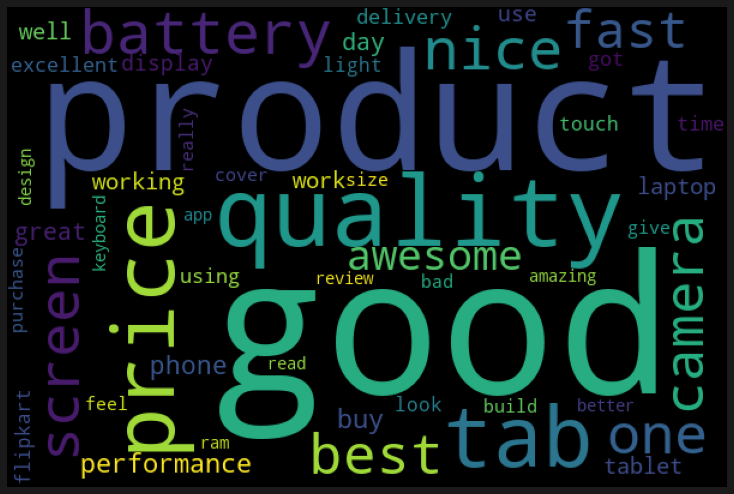

In [27]:
# Viusalising words which are categorised as lowest rating

from wordcloud import WordCloud
hams = df['text_tokens_lemma'][df['Rating']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

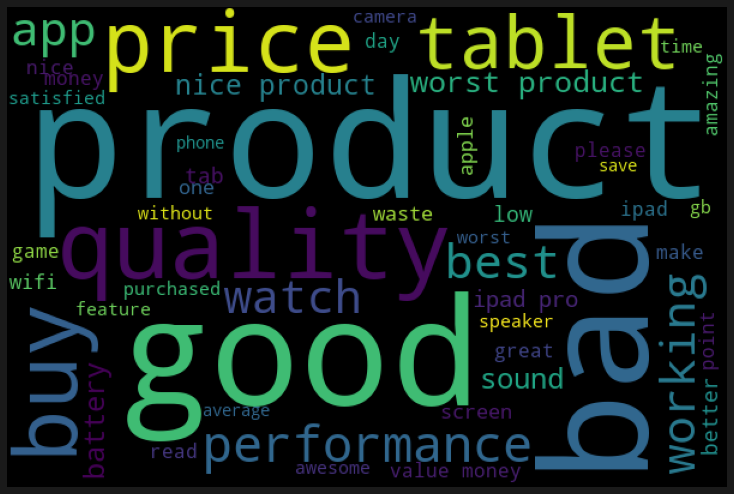

In [28]:
# Viusalising words which are categorised as rating of 2 stars

hams = df['text_tokens_lemma'][df['Rating']==2]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

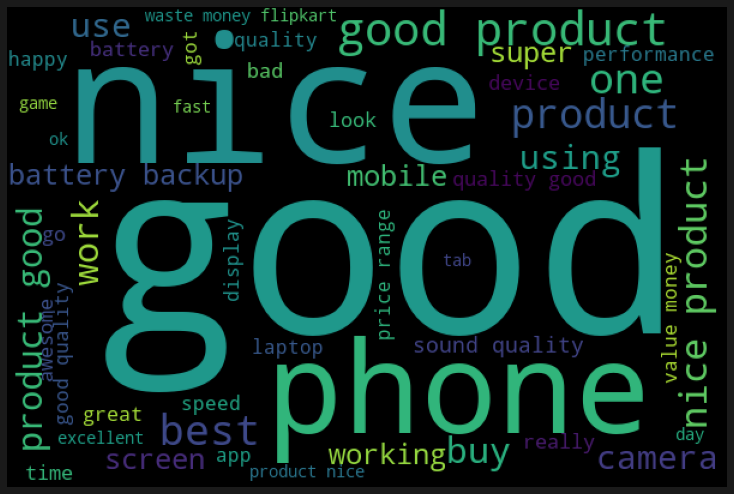

In [29]:
# Viusalising words which are categorised as rating of 3 stars

hams = df['text_tokens_lemma'][df['Rating']==3]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

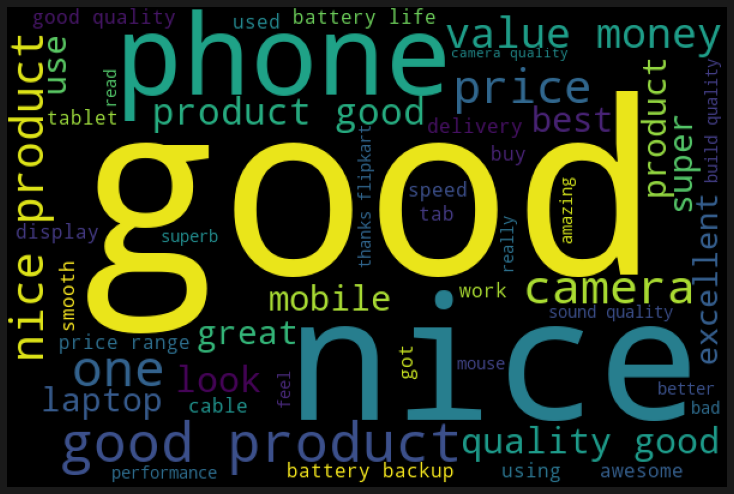

In [30]:
# Viusalising words which are categorised as rating of 4 stars

hams = df['text_tokens_lemma'][df['Rating']==4]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

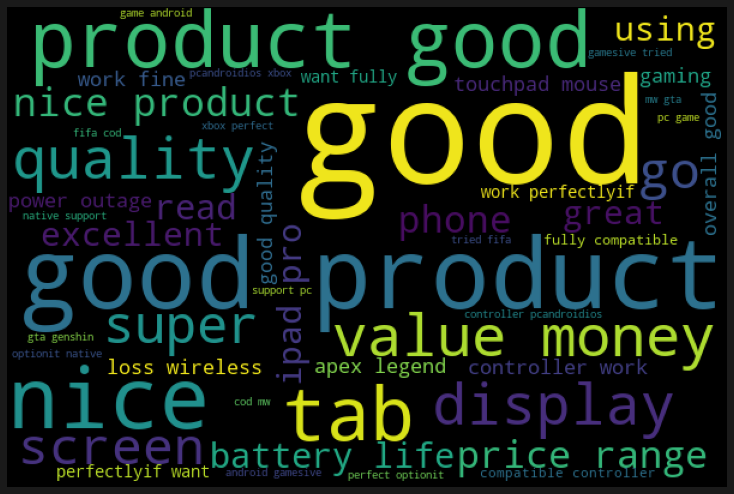

In [31]:
# Viusalising words which are categorised as rating of 5 stars

hams = df['text_tokens_lemma'][df['Rating']==5]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

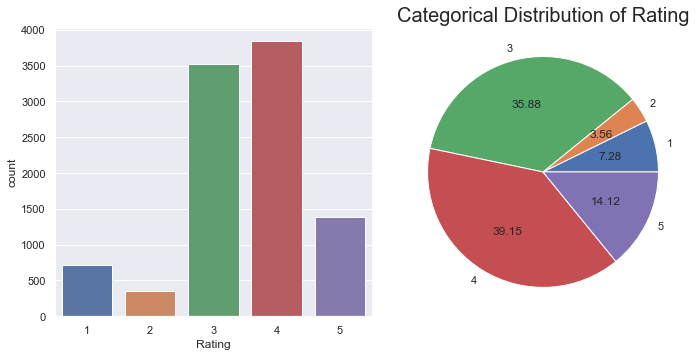

In [32]:
# distribution of multiple classses

fig, ax = plt.subplots(1,2, figsize = (10,5))

sns.countplot(df['Rating'], ax = ax[0])
df.groupby('Rating').size().plot(kind='pie', autopct='%.2f', ax =ax[1])
plt.title("Categorical Distribution of Rating", fontsize = 20)
plt.ylabel(None)
plt.tight_layout()

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20)

## Logistic Regression

In [34]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(X_train, y_train)

y_pred_train = LG.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.6404336734693877
Test accuracy is 0.5660377358490566
[[  0   0 106  13   4]
 [  0   1  66   5   1]
 [  2   1 566 153  21]
 [  0   0 269 468  27]
 [  0   0  99  84  75]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       123
           2       0.50      0.01      0.03        73
           3       0.51      0.76      0.61       743
           4       0.65      0.61      0.63       764
           5       0.59      0.29      0.39       258

    accuracy                           0.57      1961
   macro avg       0.45      0.34      0.33      1961
weighted avg       0.54      0.57      0.53      1961



<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

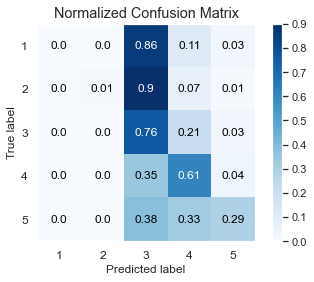

In [35]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=True)

### Random Forest Classifier

In [36]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
# Performing Evaluation metrics for our model
predrf=RF.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,predrf),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,predrf), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,predrf))
print("Hamming Loss for our Random Forest Classifier model is : ",hamming_loss(y_test,predrf))

Accuracy Score for Random Forest Classifier is : 58.9 % 

Confusion Matrix of Random Forest Classifier : 
 [[ 95   0  12  12   4]
 [ 37  14  12   7   3]
 [126   5 445 145  22]
 [ 84   2 156 498  24]
 [ 50   0  45  60 103]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           1       0.24      0.77      0.37       123
           2       0.67      0.19      0.30        73
           3       0.66      0.60      0.63       743
           4       0.69      0.65      0.67       764
           5       0.66      0.40      0.50       258

    accuracy                           0.59      1961
   macro avg       0.58      0.52      0.49      1961
weighted avg       0.65      0.59      0.60      1961

Hamming Loss for our Random Forest Classifier model is :  0.4110147883732789


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

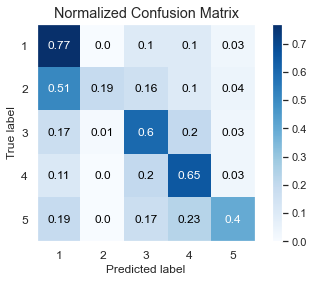

In [38]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predrf, normalize=True)

### Multinomial Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [40]:
MNB = MultinomialNB()
MNB.fit(X_train,y_train)

MultinomialNB()

In [41]:
# Performing Evaluation metrics for our model
predmnb= MNB.predict(X_test)
print('Accuracy Score for Multinomial Naive Bayes Classifier is :',round(accuracy_score(y_test,predmnb),4)*100,'% \n')
print('Confusion Matrix of Multinomial Naive Bayes Classifier : \n',confusion_matrix(y_test,predmnb), '\n')
print('Classification Multinomial Naive Bayes Classifier : \n',classification_report(y_test,predmnb))
print("Hamming Loss for our Multinomial Naive Bayes Classifier model is : ",hamming_loss(y_test,predrf))

Accuracy Score for Multinomial Naive Bayes Classifier is : 52.629999999999995 % 

Confusion Matrix of Multinomial Naive Bayes Classifier : 
 [[  0   0  14 106   3]
 [  0   0  27  45   1]
 [  0   0 414 324   5]
 [  0   0 175 583   6]
 [  0   0  51 172  35]] 

Classification Multinomial Naive Bayes Classifier : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       123
           2       0.00      0.00      0.00        73
           3       0.61      0.56      0.58       743
           4       0.47      0.76      0.58       764
           5       0.70      0.14      0.23       258

    accuracy                           0.53      1961
   macro avg       0.36      0.29      0.28      1961
weighted avg       0.51      0.53      0.48      1961

Hamming Loss for our Multinomial Naive Bayes Classifier model is :  0.4110147883732789


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

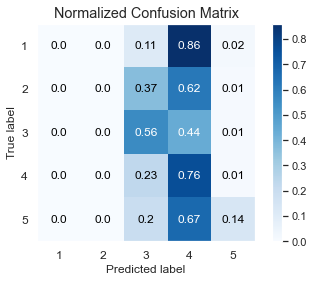

In [42]:
#Plotting Confusion Matrix of Logistic Regression model
skplt.metrics.plot_confusion_matrix(y_test, predmnb, normalize=True)

### Adaptive Boost 

In [43]:
#Instantiating adaboost model and training it

ada = AdaBoostClassifier()
ada.fit(X_train,y_train)

AdaBoostClassifier()

In [44]:
# Performing Evaluation metrics for our model
predada= ada.predict(X_test)
print('Accuracy Score for Adaptive Boost Classifier is :',round(accuracy_score(y_test,predada),4)*100,'% \n')
print('Confusion Matrix of Adaptive Boost Classifier : \n',confusion_matrix(y_test,predada), '\n')
print('Classification Adaptive Boost Classifier : \n',classification_report(y_test,predada))
print("Hamming Loss for our Adaptive Boost Classifier is : ",hamming_loss(y_test,predada))

Accuracy Score for Adaptive Boost Classifier is : 48.75 % 

Confusion Matrix of Adaptive Boost Classifier : 
 [[  0   1 106  13   3]
 [  1   3  59   9   1]
 [  0   1 476 250  16]
 [  0   2 304 449   9]
 [  0   0 102 128  28]] 

Classification Adaptive Boost Classifier : 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       123
           2       0.43      0.04      0.07        73
           3       0.45      0.64      0.53       743
           4       0.53      0.59      0.56       764
           5       0.49      0.11      0.18       258

    accuracy                           0.49      1961
   macro avg       0.38      0.28      0.27      1961
weighted avg       0.46      0.49      0.44      1961

Hamming Loss for our Adaptive Boost Classifier is :  0.5124936257011729


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

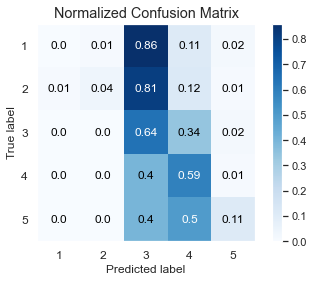

In [45]:
#Plotting Confusion Matrix of AdaBoost model
skplt.metrics.plot_confusion_matrix(y_test, predada, normalize=True)

### LinearSVC

In [46]:
from sklearn.svm import LinearSVC

In [47]:
svc = LinearSVC(max_iter = 3000)
svc.fit(X_train,y_train)

LinearSVC(max_iter=3000)

In [48]:
# Performing Evaluation metrics for our model
predsvc= svc.predict(X_test)
print('Accuracy Score for Linear SVC is :',round(accuracy_score(y_test,predsvc),4)*100,'% \n')
print('Confusion Matrix of Linear SVC : \n',confusion_matrix(y_test,predsvc), '\n')
print('Classification MLinear SVC : \n',classification_report(y_test,predsvc))
print("Hamming Loss for our Linear SVC model is : ",hamming_loss(y_test,predsvc))


Accuracy Score for Linear SVC is : 58.08 % 

Confusion Matrix of Linear SVC : 
 [[  3   0 105  10   5]
 [  0   8  62   1   2]
 [  6   4 582 122  29]
 [  4   1 273 444  42]
 [  0   0 103  53 102]] 

Classification MLinear SVC : 
               precision    recall  f1-score   support

           1       0.23      0.02      0.04       123
           2       0.62      0.11      0.19        73
           3       0.52      0.78      0.62       743
           4       0.70      0.58      0.64       764
           5       0.57      0.40      0.47       258

    accuracy                           0.58      1961
   macro avg       0.53      0.38      0.39      1961
weighted avg       0.58      0.58      0.56      1961

Hamming Loss for our Linear SVC model is :  0.4191738908720041


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

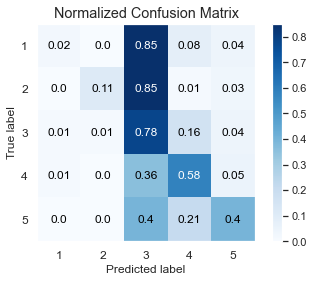

In [49]:
#Plotting Confusion Matrix of SVC model
skplt.metrics.plot_confusion_matrix(y_test, predsvc , normalize=True)

## Cross Validation Scores

In [98]:
CVscore_LR = cross_val_score(LG,X,y,cv = 10 )
print("Cross validation score of Logistic Regression is :", round(CVscore_LR.mean(),4)*100,'%')

CVscore_RF = cross_val_score(RF,X,y,cv = 10 )
print("Cross validation score of Random Forest Classifier :", round(CVscore_RF.mean(),4)*100,'%')

CVscore_adaboost = cross_val_score(ada,X,y,cv = 10 )
print("Cross validation score of AdaBoost Classifier is :",round(CVscore_adaboost.mean(),4)*100,'%')

CVscore_mnb = cross_val_score(MNB,X,y,cv = 10 )
print("Cross validation score of MNB Classifier is :",round(CVscore_mnb.mean(),4)*100,'%')

CVscore_svc = cross_val_score(svc,X,y, cv = 10)
print("Cross validation score of Linear Support Vector Classifier:", round(CVscore_svc.mean(),3)*100,'%')

Cross validation score of Logistic Regression is : 52.839999999999996 %
Cross validation score of Random Forest Classifier : 56.52 %
Cross validation score of AdaBoost Classifier is : 42.75 %
Cross validation score of MNB Classifier is : 49.69 %
Cross validation score of Linear Support Vector Classifier: 54.50000000000001 %


### Using LSTM Model

In [51]:
import tensorflow as tf
from keras.models import Sequential
from keras import utils
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten, Dense
from keras.layers.recurrent import LSTM
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential


In [52]:
df['Rating'] = df.iloc[:,].sum(axis=1)
y = df['Rating']

In [53]:
corpus = df['text_tokens_lemma']
corpus

0       good handy phone decent performance good first...
1       good handy phone decent performance good first...
2       nice phone realme loved camera good battery al...
3       nice phone realme loved camera good battery al...
4       really nice phone delivery fast thats excellen...
                              ...                        
9796    purchased week back u really best buy value mo...
9797    wire quality pretty good length wire also good...
9798                                                     
9799                                                     
9800    day since ive started using product work reall...
Name: text_tokens_lemma, Length: 9801, dtype: object

In [54]:
voc_size = 5000

onehot_repr = [one_hot(words, voc_size) for words in corpus]
onehot_repr

[[2339,
  4345,
  4613,
  3513,
  4417,
  2339,
  2733,
  1681,
  4893,
  3727,
  2592,
  4000,
  3412,
  1348,
  273,
  4370,
  931,
  1790,
  950,
  4270,
  380,
  467],
 [2339,
  4345,
  4613,
  3513,
  4417,
  2339,
  2733,
  1681,
  4893,
  3727,
  2592,
  4000,
  3412,
  1348,
  273,
  4370,
  931,
  1790,
  950,
  4270,
  380,
  467],
 [2478, 4613, 4495, 898, 3613, 2339, 2592, 1587, 2339, 2837, 2837],
 [2478, 4613, 4495, 898, 3613, 2339, 2592, 1587, 2339, 2837, 2837],
 [2617,
  2478,
  4613,
  812,
  3755,
  4938,
  336,
  2339,
  2592,
  3797,
  4417,
  3613,
  1587,
  2339,
  574,
  1245],
 [2617,
  2478,
  4613,
  812,
  3755,
  4938,
  336,
  2339,
  2592,
  3797,
  4417,
  3613,
  1587,
  2339,
  574,
  1245],
 [2478,
  2815,
  3870,
  4758,
  1059,
  812,
  1283,
  4758,
  2478,
  1864,
  4613,
  2691,
  3211,
  1472,
  2111,
  4495,
  4270,
  4450,
  2478,
  4125,
  2442,
  2535,
  4758,
  3533,
  3306,
  2147],
 [2478,
  2815,
  3870,
  4758,
  1059,
  812,
  1283,
  475

In [55]:
longest = max(corpus,key=len)
len(longest)

438

### Embedding Representation

In [63]:
sent_len = 100
embedded_docs = pad_sequences(onehot_repr,padding = 'pre', maxlen = sent_len)
print(embedded_docs)

[[   0    0    0 ... 4270  380  467]
 [   0    0    0 ... 4270  380  467]
 [   0    0    0 ... 2339 2837 2837]
 ...
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [   0    0    0 ... 4105 3494 4116]]


### Creatig LSTM Model

In [64]:
## Creating Model

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_len))
model.add(LSTM(100))
model.add(Dense(1,activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 40)           200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
len(embedded_docs),y.shape

(9801, (9801,))

In [66]:
X_final = np.array(embedded_docs) 
y_final = np.array(y)

In [67]:
X_final.shape , y_final.shape

((9801, 100), (9801,))

In [68]:
X_train,X_test, y_train,y_test = train_test_split(X_final,y_final, test_size = 0.3, random_state = 42)

In [69]:
### Training model 

history = model.fit(X_train,y_train, validation_data = (X_test,y_test),epochs = 10, batch_size = 64)

Epoch 1/10
108/108 [==============================] - 39s 315ms/step - loss: -36.2074 - accuracy: 0.0751 - val_loss: -57.0038 - val_accuracy: 0.0673
Epoch 2/10
108/108 [==============================] - 43s 395ms/step - loss: -70.8420 - accuracy: 0.0752 - val_loss: -84.7731 - val_accuracy: 0.0673
Epoch 3/10
108/108 [==============================] - 30s 279ms/step - loss: -98.0870 - accuracy: 0.0752 - val_loss: -111.6564 - val_accuracy: 0.0673
Epoch 4/10
108/108 [==============================] - 27s 248ms/step - loss: -124.6689 - accuracy: 0.0752 - val_loss: -138.0563 - val_accuracy: 0.0673
Epoch 5/10
108/108 [==============================] - 25s 229ms/step - loss: -151.0707 - accuracy: 0.0752 - val_loss: -164.3154 - val_accuracy: 0.0673
Epoch 6/10
108/108 [==============================] - 25s 228ms/step - loss: -177.3235 - accuracy: 0.0752 - val_loss: -190.4820 - val_accuracy: 0.0673
Epoch 7/10
108/108 [==============================] - 26s 243ms/step - loss: -203.4585 - accuracy: 

In [70]:
y_predict = np.argmax(model.predict(X_test), axis=-1)

In [71]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [72]:
classes_x=np.argmax(y_pred,axis=1)
classes_x

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
## correct prediction
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [74]:
accuracy_score(y_test,y_pred)

0.06732403944236655

In [75]:
confusion_matrix(y_test,y_pred)

array([[ 198,    0,    0,    0,    0],
       [  99,    0,    0,    0,    0],
       [1095,    0,    0,    0,    0],
       [1158,    0,    0,    0,    0],
       [ 391,    0,    0,    0,    0]], dtype=int64)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

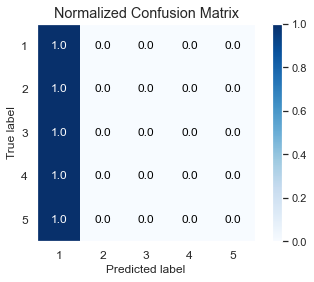

In [76]:
#Plotting Confusion Matrix of LSTM  model
skplt.metrics.plot_confusion_matrix(y_test, y_pred , normalize=True)

In [77]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     198.0
           2       0.00      0.00      0.00      99.0
           3       0.00      0.00      0.00    1095.0
           4       0.00      0.00      0.00    1158.0
           5       0.00      0.00      0.00     391.0

    accuracy                           0.00    2941.0
   macro avg       0.00      0.00      0.00    2941.0
weighted avg       0.00      0.00      0.00    2941.0



In [78]:
hamming_loss(y_test,classes_x)

1.0

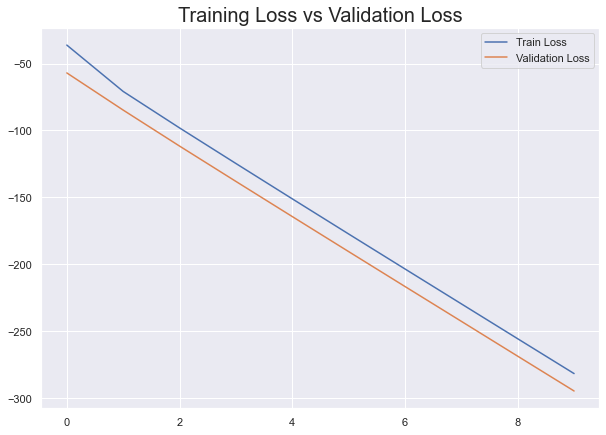

In [79]:
plt.figure(figsize = (10,7))
plt.title("Training Loss vs Validation Loss",fontsize =20)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

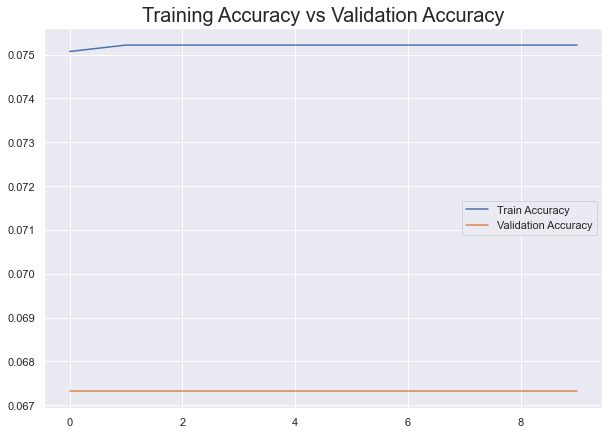

In [80]:
plt.figure(figsize = (10,7))
plt.title("Training Accuracy vs Validation Accuracy",fontsize =20)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

### Adding a Dropout of 30%

In [81]:
from tensorflow.keras.layers import Dropout

In [82]:
## Creating Model

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length = sent_len))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid')) 
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 40)           200000    
_________________________________________________________________
dropout (Dropout)            (None, 100, 40)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
history = model.fit(X_train,y_train, validation_data = (X_test,y_test),epochs = 20, batch_size = 128)

Epoch 1/20
54/54 [==============================] - 35s 562ms/step - loss: -22.1199 - accuracy: 0.0751 - val_loss: -41.1311 - val_accuracy: 0.0673
Epoch 2/20
54/54 [==============================] - 37s 689ms/step - loss: -49.4485 - accuracy: 0.0752 - val_loss: -57.6199 - val_accuracy: 0.0673
Epoch 3/20
54/54 [==============================] - 31s 574ms/step - loss: -64.7241 - accuracy: 0.0752 - val_loss: -72.1272 - val_accuracy: 0.0673
Epoch 4/20
54/54 [==============================] - 21s 383ms/step - loss: -78.9739 - accuracy: 0.0752 - val_loss: -86.0719 - val_accuracy: 0.0673
Epoch 5/20
54/54 [==============================] - 28s 521ms/step - loss: -92.8614 - accuracy: 0.0752 - val_loss: -99.8256 - val_accuracy: 0.0673
Epoch 6/20
54/54 [==============================] - 23s 421ms/step - loss: -106.4647 - accuracy: 0.0752 - val_loss: -113.3914 - val_accuracy: 0.0673
Epoch 7/20
54/54 [==============================] - 22s 408ms/step - loss: -119.9567 - accuracy: 0.0752 - val_loss: 

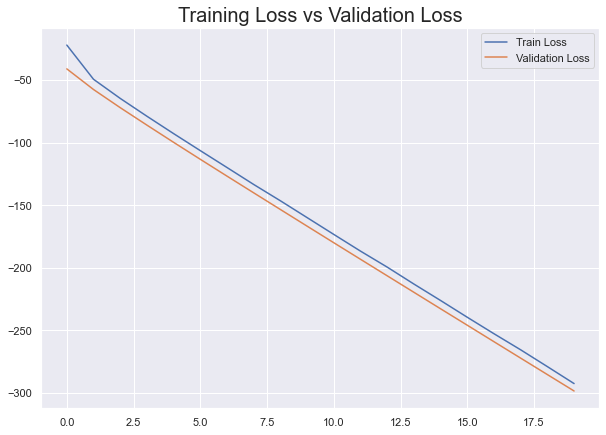

In [84]:
plt.figure(figsize = (10,7))
plt.title("Training Loss vs Validation Loss",fontsize =20)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()

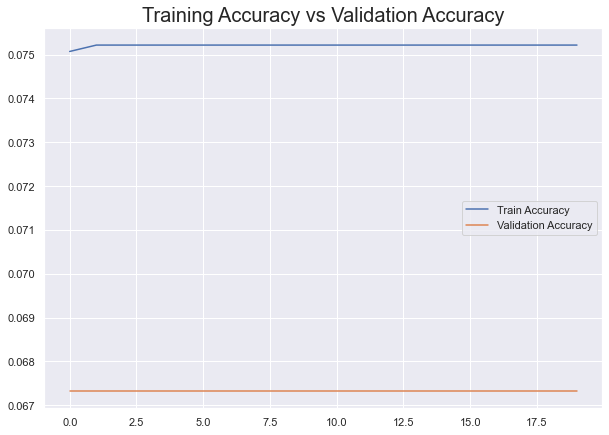

In [85]:
plt.figure(figsize = (10,7))
plt.title("Training Accuracy vs Validation Accuracy",fontsize =20)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

In [86]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

In [87]:
classes_x=np.argmax(y_pred,axis=1)
classes_x

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [88]:
accuracy_score(y_test,classes_x)

0.0

In [89]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     198.0
           2       0.00      0.00      0.00      99.0
           3       0.00      0.00      0.00    1095.0
           4       0.00      0.00      0.00    1158.0
           5       0.00      0.00      0.00     391.0

    accuracy                           0.00    2941.0
   macro avg       0.00      0.00      0.00    2941.0
weighted avg       0.00      0.00      0.00    2941.0



In [90]:
hamming_loss(y_test,y_pred)

0.9326759605576335

In [91]:
confusion_matrix(y_test,classes_x)

array([[   0,    0,    0,    0,    0,    0],
       [ 198,    0,    0,    0,    0,    0],
       [  99,    0,    0,    0,    0,    0],
       [1095,    0,    0,    0,    0,    0],
       [1158,    0,    0,    0,    0,    0],
       [ 391,    0,    0,    0,    0,    0]], dtype=int64)

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

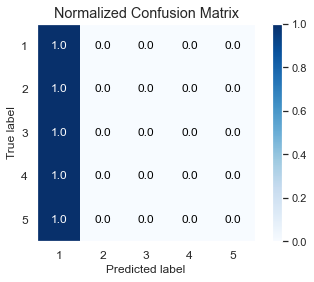

In [92]:
#Plotting Confusion Matrix of LSTM  model
skplt.metrics.plot_confusion_matrix(y_test, y_pred , normalize=True)

### Hyper Parameter Tuning

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [94]:
params = {'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'n_estimators' : [70,80,90,100,110,120,130,140],
         'criterion' : ['gini','entropy'],
         'max_depth':[3,5,7,9,10,11, None],
         'min_samples_split':[2,3,4,5,6,7,8,9]}

In [95]:
#Instantiating Randomized SearchCV
randomcv = RandomizedSearchCV(estimator = RF, param_distributions = params, n_iter = 100, cv = 3, verbose=2, random_state=42)

In [96]:
#fitting our random search cv model

randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   1.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   1.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=3, min_samples_split=6, n_estimators=130; total time=   1.0s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   1.3s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   1.7s
[CV] END criterion=gini, max_depth=9, min_samples_leaf=7, min_samples_split=3, n_estimators=130; total time=   1.1s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=110; total time=   1.0s
[CV] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=7, n_estimators=110; total time=   0.9s
[CV

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 7, 9, 10, 11, None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [70, 80, 90, 100, 110,
                                                         120, 130, 140]},
                   random_state=42, verbose=2)

In [97]:
#To check the best parameters to increase model Accuracy
randomcv.best_params_

{'n_estimators': 80,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None,
 'criterion': 'entropy'}

In [99]:
model = RandomForestClassifier(n_estimators = 80, min_samples_split = 4, min_samples_leaf = 1,
                               max_depth = None, criterion = 'entropy')

In [100]:
#Fitting our Tuned Model
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=4,
                       n_estimators=80)

In [101]:
# Performing Evaluation metrics for our model
y_pred = model.predict(X_test)
print('Accuracy Score for Random Forest Classifier is :',round(accuracy_score(y_test,y_pred),4)*100,'% \n')
print('Confusion Matrix of Random Forest Classifier : \n',confusion_matrix(y_test,y_pred), '\n')
print('Classification Random Forest Classifier : \n',classification_report(y_test,y_pred))

Accuracy Score for Random Forest Classifier is : 59.95 % 

Confusion Matrix of Random Forest Classifier : 
 [[171   0  11  15   1]
 [ 57  12  16  11   3]
 [172   6 651 242  24]
 [133   4 213 776  32]
 [ 68   0  69 101 153]] 

Classification Random Forest Classifier : 
               precision    recall  f1-score   support

           1       0.28      0.86      0.43       198
           2       0.55      0.12      0.20        99
           3       0.68      0.59      0.63      1095
           4       0.68      0.67      0.67      1158
           5       0.72      0.39      0.51       391

    accuracy                           0.60      2941
   macro avg       0.58      0.53      0.49      2941
weighted avg       0.65      0.60      0.60      2941



array([[171,   0,  11,  15,   1],
       [ 57,  12,  16,  11,   3],
       [172,   6, 651, 242,  24],
       [133,   4, 213, 776,  32],
       [ 68,   0,  69, 101, 153]], dtype=int64)

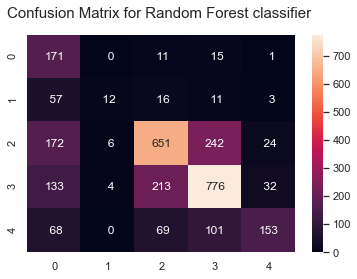

In [102]:
cm = confusion_matrix(y_test,y_pred)

#visualize confusion matrix 

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f')
plt.title('Confusion Matrix for Random Forest classifier ', y=1.05, size=15)
cm

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

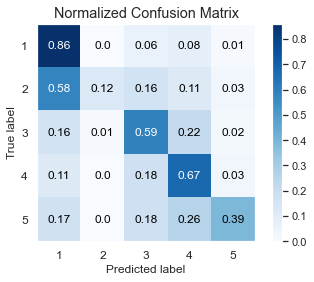

In [103]:
#Plotting Confusion Matrix Gradient Boosting Classifier model
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### Saving our Final Model

In [104]:
joblib.dump(model,"RatingsPredictiion.pkl")

['RatingsPredictiion.pkl']

### Loading Model

In [105]:
Model = joblib.load("RatingsPredictiion.pkl")

In [106]:
#predicting test data using loaded model
prediction = Model.predict(X_test)
prediction

array([3, 3, 3, ..., 3, 4, 4], dtype=int64)

In [107]:
#Analysing Predicted vs Actual
results = pd.DataFrame()
results['Predicted'] = prediction
results['Actual'] = y
results

,Predicted,Actual
0,3,4
1,3,4
2,3,4
3,4,4
4,4,4
...,...,...
2936,5,3
2937,1,4
2938,3,4
2939,4,3


In [108]:
#Converting the saved file into .csv format
results.to_csv('Results.csv',index = True)